<a href="https://colab.research.google.com/github/Anurag928/Data-Analysis-Projects/blob/main/Customer_Segmentation_Using_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
df = pd.DataFrame({
    'Age': np.random.randint(18, 65, size=200),
    'Annual Income (k$)': np.random.randint(20, 120, size=200),
    'Spending Score (1-100)': np.random.randint(1, 101, size=200),
    'Frequency': np.random.randint(1, 21, size=200)
})

df.to_csv('customer_segments.csv', index=False)
df.head()


,Age,Annual Income (k$),Spending Score (1-100),Frequency
0,56,58,13,19
1,46,21,60,17
2,32,22,7,4
3,60,75,57,12
4,25,100,36,9


In [ ]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Frequency']
X = df[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)
display(df.head())

,Age,Annual Income (k$),Spending Score (1-100),Frequency,Cluster
0,56,58,13,19,0
1,46,21,60,17,0
2,32,22,7,4,3
3,60,75,57,12,0
4,25,100,36,9,2


In [ ]:

summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Frequency']].mean().round(2)
summary


,Age,Annual Income (k$),Spending Score (1-100),Frequency
Cluster,,,,
0,56.04,52.71,25.83,12.60
1,50.06,70.06,85.14,5.86
2,35.58,100.02,45.74,13.42
3,29.93,45.72,57.43,8.02


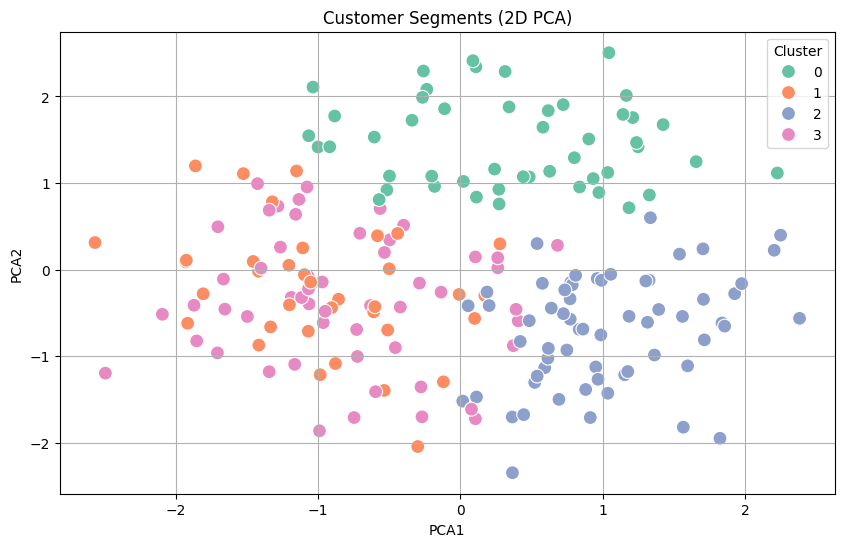

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_data)
df['PCA1'] = reduced[:, 0]
df['PCA2'] = reduced[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments (2D PCA)')
plt.grid(True)
plt.show()


In [ ]:
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Frequency']].mean().round(2)


,Age,Annual Income (k$),Spending Score (1-100),Frequency
Cluster,,,,
0,56.04,52.71,25.83,12.60
1,50.06,70.06,85.14,5.86
2,35.58,100.02,45.74,13.42
3,29.93,45.72,57.43,8.02


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Customize axes here — you can change which variables you want to view
ax.scatter(
    df['Age'],
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['Cluster'],
    cmap='Set2',
    s=60
)

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score")
plt.title("3D View of Customer Clusters")
plt.show()
